In [12]:
%run ./config.ipynb

Cortex Python SDK v5.6.0


/miniconda3/envs/world_cup_motm/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/miniconda3/envs/world_cup_motm/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
cortex = Cortex.client()
builder = cortex.builder()

In [20]:
train_df = pd.read_csv('wc.csv')

In [24]:
train_ds = builder.dataset('kaggle/worldcup')\
    .title('World Cup Training Data')\
    .from_df(train_df).build()
    
print("%s (%s) v%d" % (train_ds.title, train_ds.name, train_ds.version))

World Cup Training Data (kaggle/worldcup) v31


In [28]:
train_ds.parameters

[{'name': 'Date', 'type': 'string'},
 {'name': 'Team', 'type': 'string'},
 {'name': 'Opponent', 'type': 'string'},
 {'name': 'Goal Scored', 'type': 'integer', 'format': 'int64'},
 {'name': 'Ball Possession %', 'type': 'integer', 'format': 'int64'},
 {'name': 'Attempts', 'type': 'integer', 'format': 'int64'},
 {'name': 'On-Target', 'type': 'integer', 'format': 'int64'},
 {'name': 'Off-Target', 'type': 'integer', 'format': 'int64'},
 {'name': 'Blocked', 'type': 'integer', 'format': 'int64'},
 {'name': 'Corners', 'type': 'integer', 'format': 'int64'},
 {'name': 'Offsides', 'type': 'integer', 'format': 'int64'},
 {'name': 'Free Kicks', 'type': 'integer', 'format': 'int64'},
 {'name': 'Saves', 'type': 'integer', 'format': 'int64'},
 {'name': 'Pass Accuracy %', 'type': 'integer', 'format': 'int64'},
 {'name': 'Passes', 'type': 'integer', 'format': 'int64'},
 {'name': 'Distance Covered (Kms)', 'type': 'integer', 'format': 'int64'},
 {'name': 'Fouls Committed', 'type': 'integer', 'format': 'in

In [32]:
train_ds.data_dictionary(train_df)

,Attribute,Type,% Nulls,Count,Unique,Observations
0,1st Goal,float64,0.270,94,56,max=90.0 | min=1.0 | mean=39.46
1,Attempts,int64,0.000,128,24,max=26 | min=3 | mean=12.59
2,Ball Possession %,int64,0.000,128,43,max=75 | min=25 | mean=49.99
3,Blocked,int64,0.000,128,11,max=10 | min=0 | mean=3.36
4,Corners,int64,0.000,128,12,max=11 | min=0 | mean=4.72
5,Date,object,0.000,128,25,Sample: 15-06-2018 | 19-06-2018 | 25-06-2018
6,Distance Covered (Kms),int64,0.000,128,35,max=148 | min=80 | mean=106.66
7,Fouls Committed,int64,0.000,128,21,max=25 | min=5 | mean=13.55
8,Free Kicks,int64,0.000,128,21,max=26 | min=5 | mean=14.89
9,Goal Scored,int64,0.000,128,7,max=6 | min=0 | mean=1.32


In [36]:
viz = train_ds.visuals(train_df, figsize=(27,9))

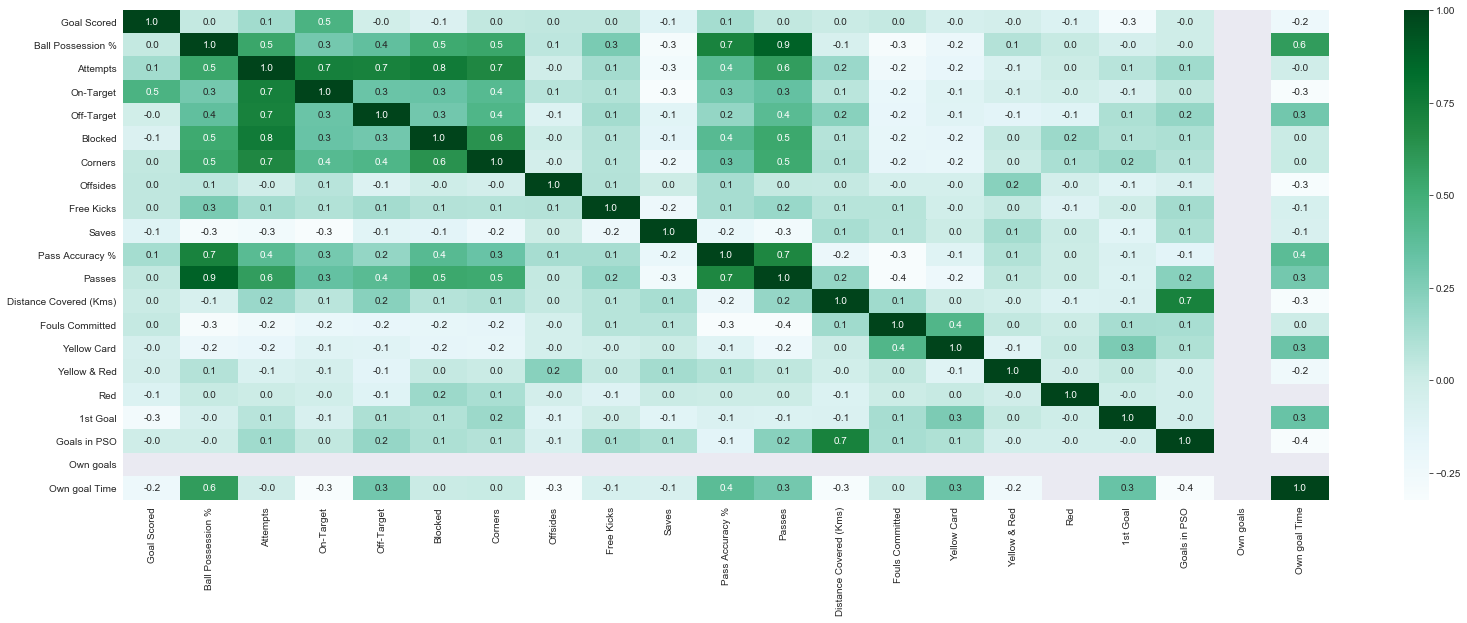

<Figure size 1944x648 with 0 Axes>

In [40]:
viz.show_corr_heatmap()

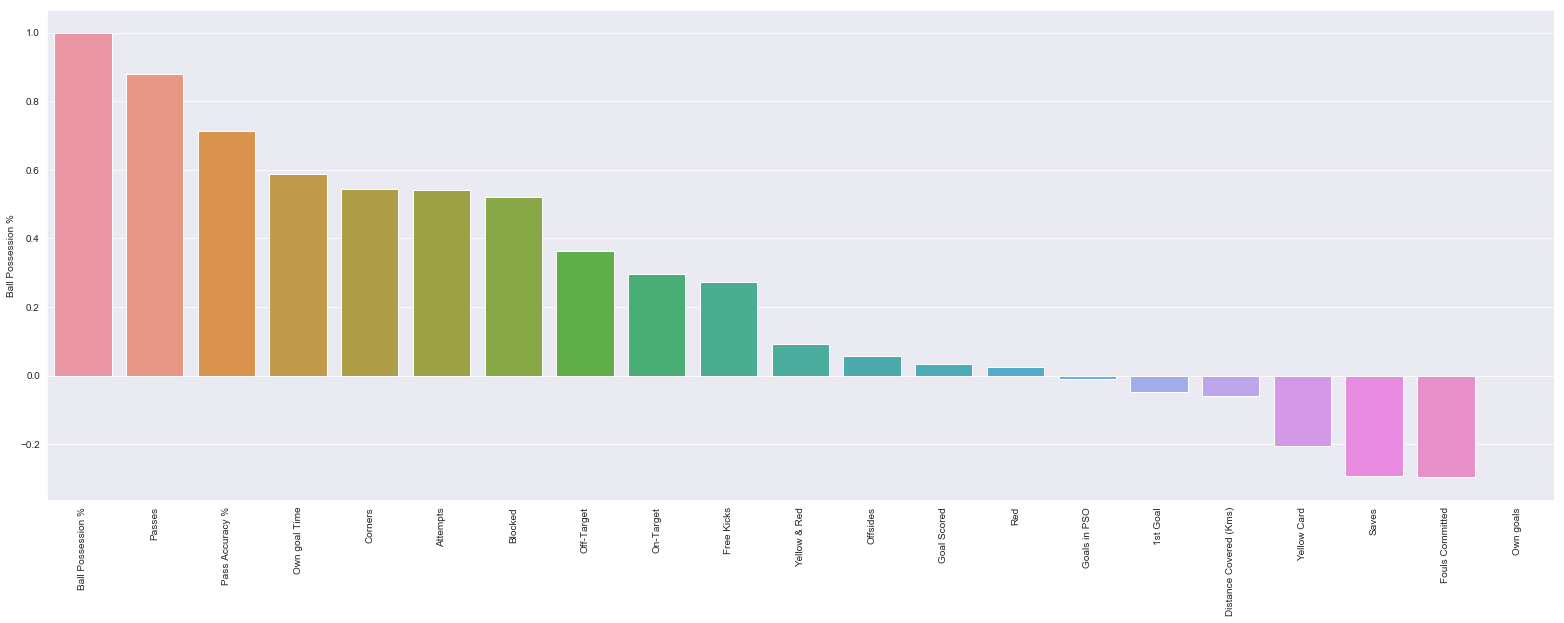

<Figure size 1944x648 with 0 Axes>

In [44]:
viz.show_corr('Ball Possession %')

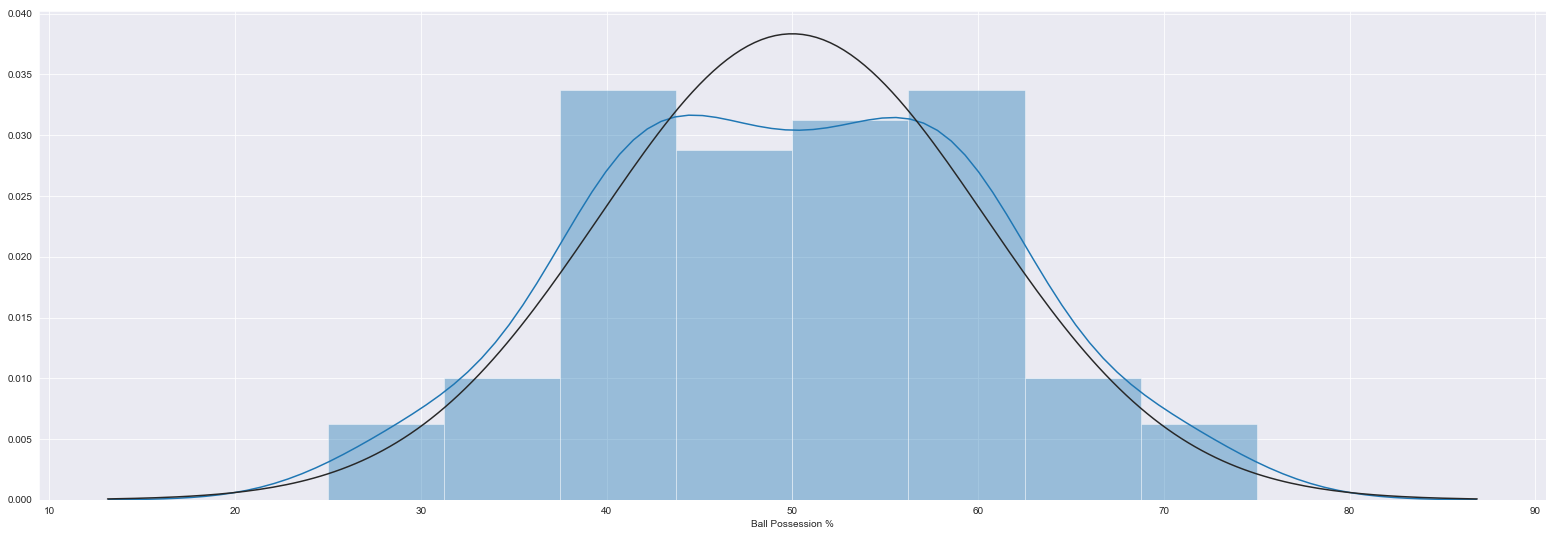

<Figure size 1944x648 with 0 Axes>

In [48]:
viz.show_dist('Ball Possession %')

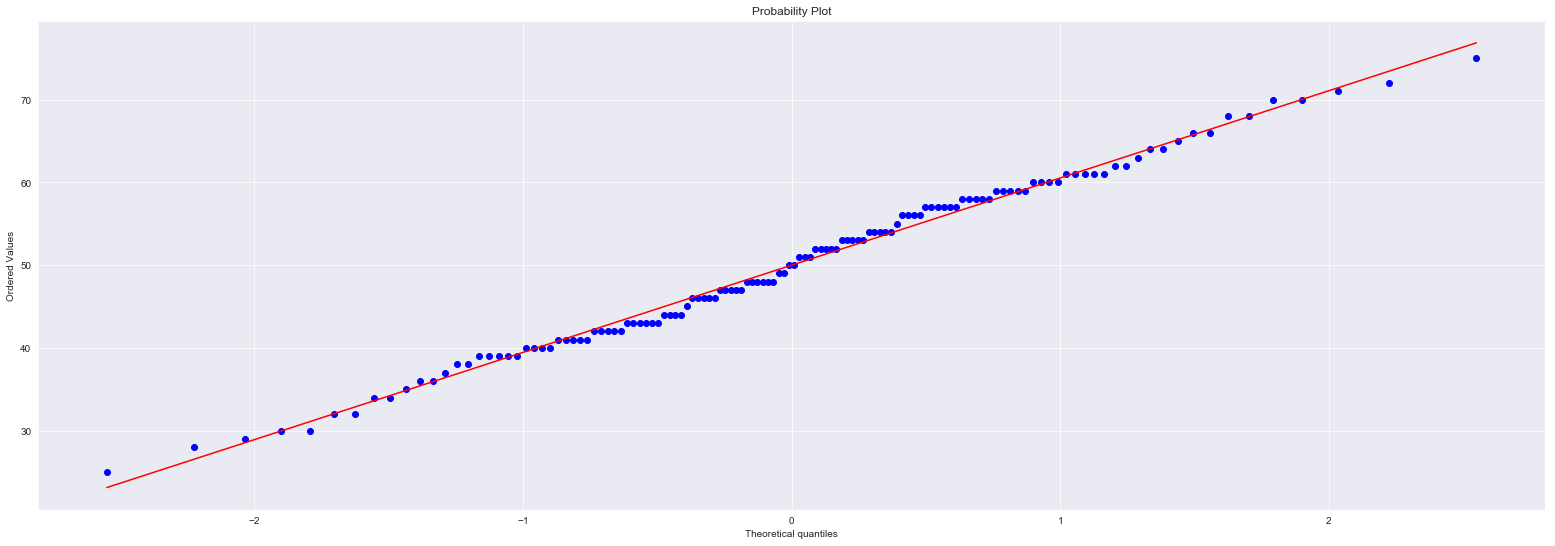

<Figure size 1944x648 with 0 Axes>

In [52]:
viz.show_probplot('Ball Possession %')

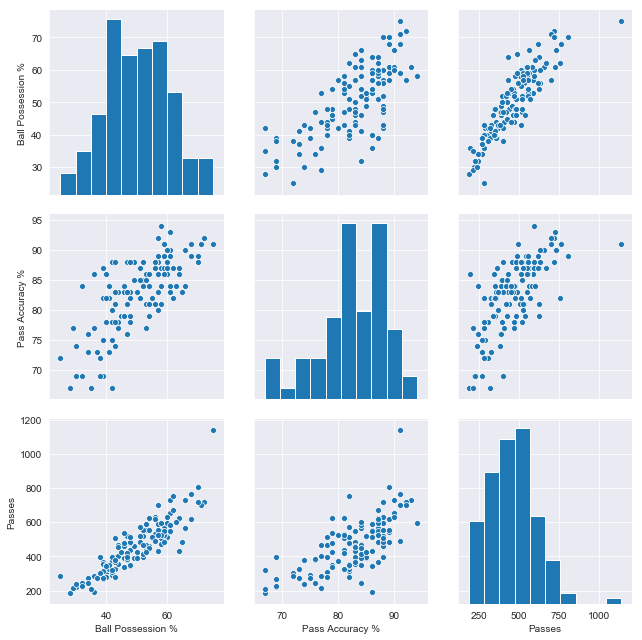

<Figure size 1944x648 with 0 Axes>

In [56]:
viz.show_corr_pairs('Ball Possession %', threshold=0.7)

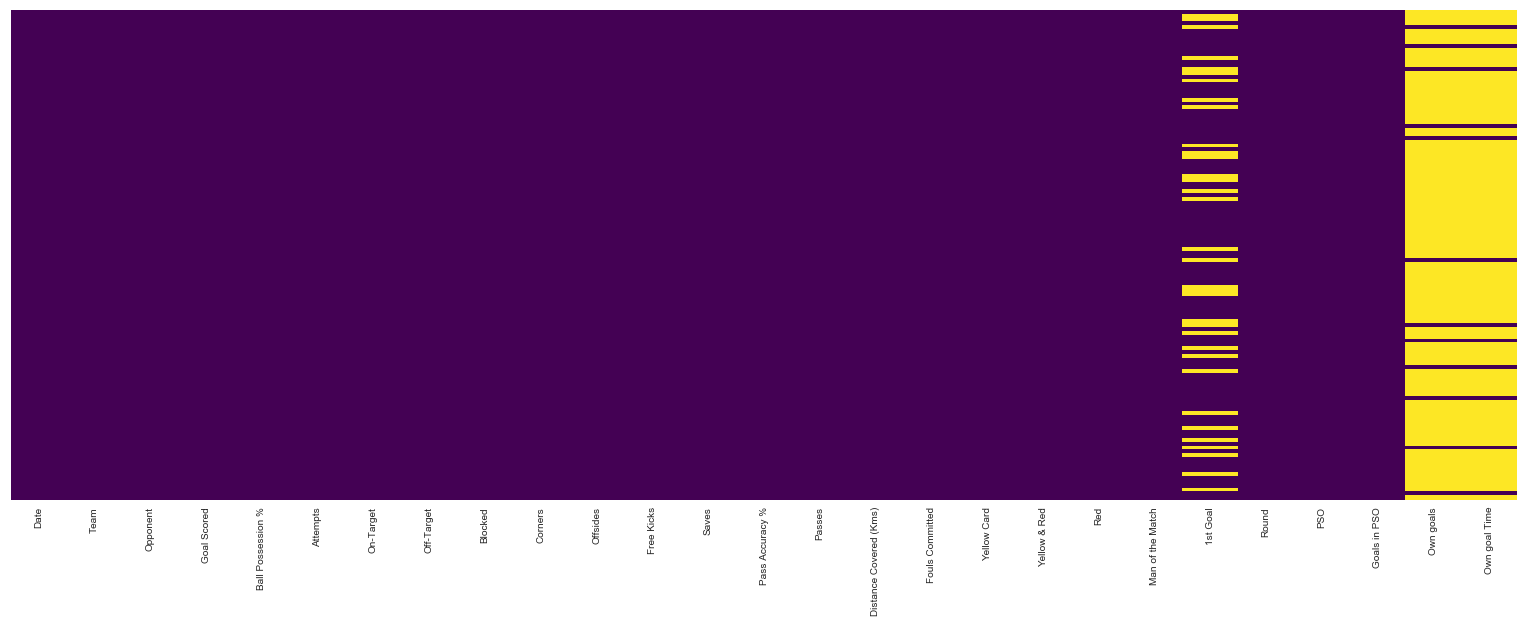

<Figure size 1944x648 with 0 Axes>

In [60]:
viz.show_missing()

In [64]:
pipeline = train_ds.pipeline('clean', clear_cache=True)
pipeline.reset()

In [68]:
def drop_unused(pipeline, df):
    df.drop(columns=['Own goals', 'Own goal Time', '1st Goal', 'Team', 'Date', 'Opponent', 'Round', 'PSO', 'Goals in PSO'], axis=1, inplace=True)

pipeline.add_step(drop_unused)

In [72]:
train_df = pipeline.run(pd.read_csv('wc.csv'))
train_ds.save()

running pipeline [clean]:
> drop_unused 


In [76]:
viz = train_ds.visuals(train_df, figsize=(24, 9))

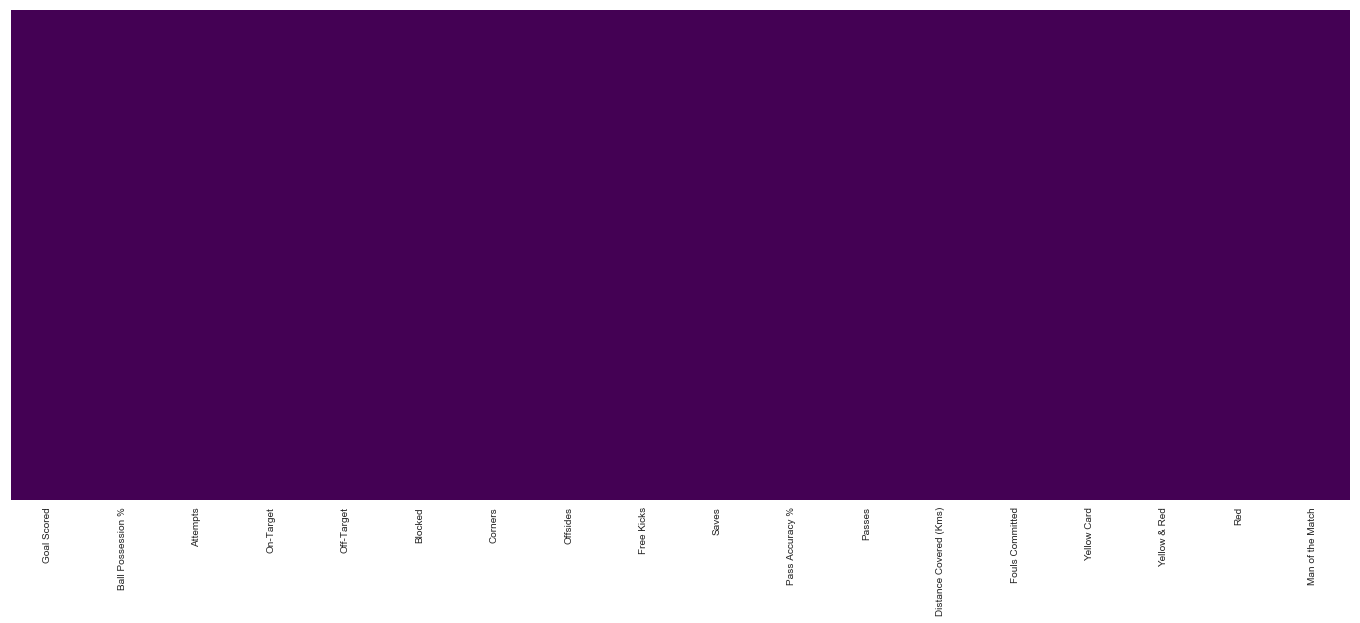

<Figure size 1944x648 with 0 Axes>

In [80]:
viz.show_missing()

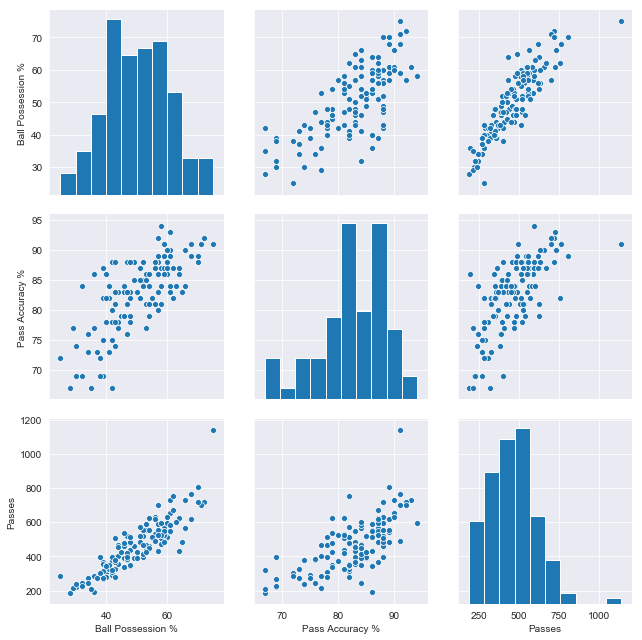

<Figure size 1728x648 with 0 Axes>

In [84]:
viz.show_corr_pairs('Ball Possession %', threshold=0.7)

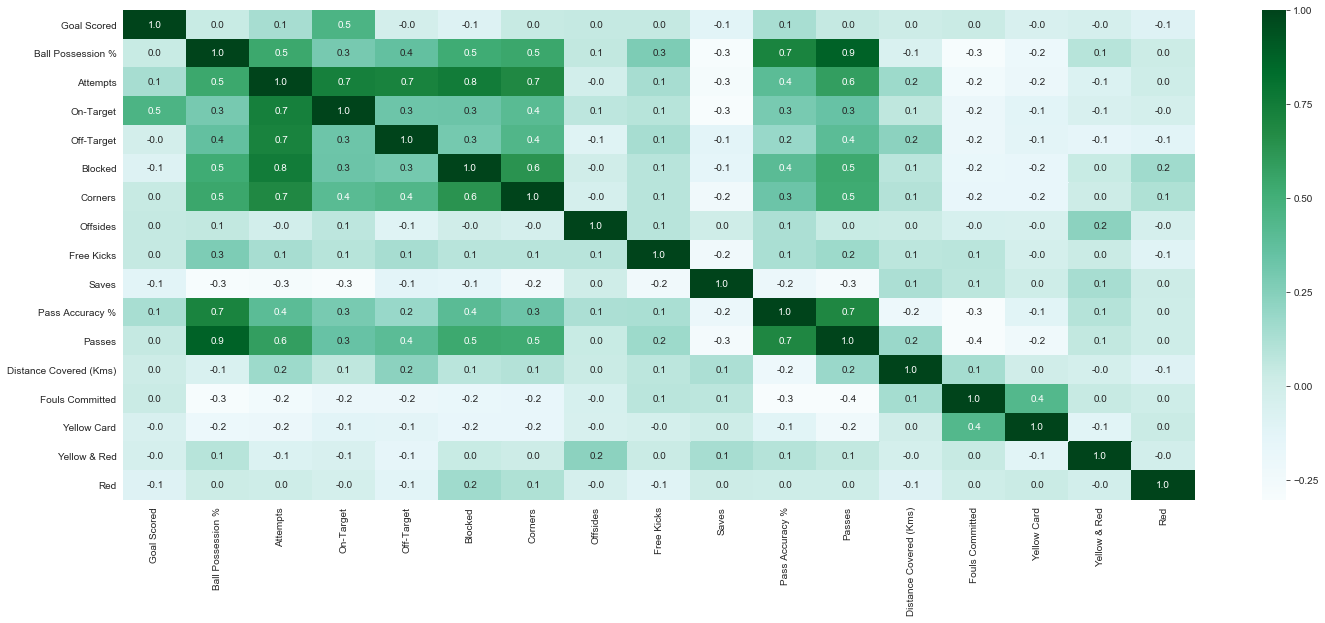

<Figure size 1728x648 with 0 Axes>

In [88]:
viz.show_corr_heatmap()

In [92]:
def toBoolean(x):
    if x == 'Yes':
        return 1
    else:
        return 0


In [96]:
train_df['Man of the Match'] = train_df['Man of the Match'].map(toBoolean)

In [100]:
train_df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,1
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,1
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
5,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,1
6,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,0
7,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,1
8,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,1
9,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,0


In [104]:
viz = train_ds.visuals(train_df, figsize=(24, 9))

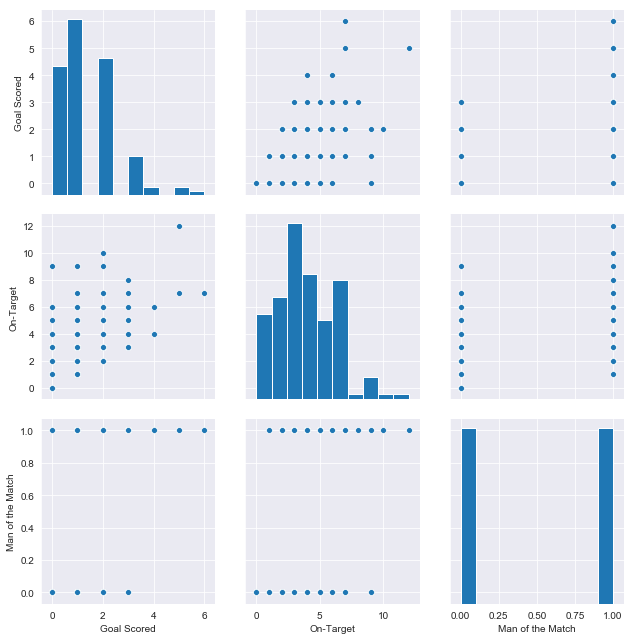

<Figure size 1728x648 with 0 Axes>

In [108]:
viz.show_corr_pairs('Man of the Match', threshold = 0.2)

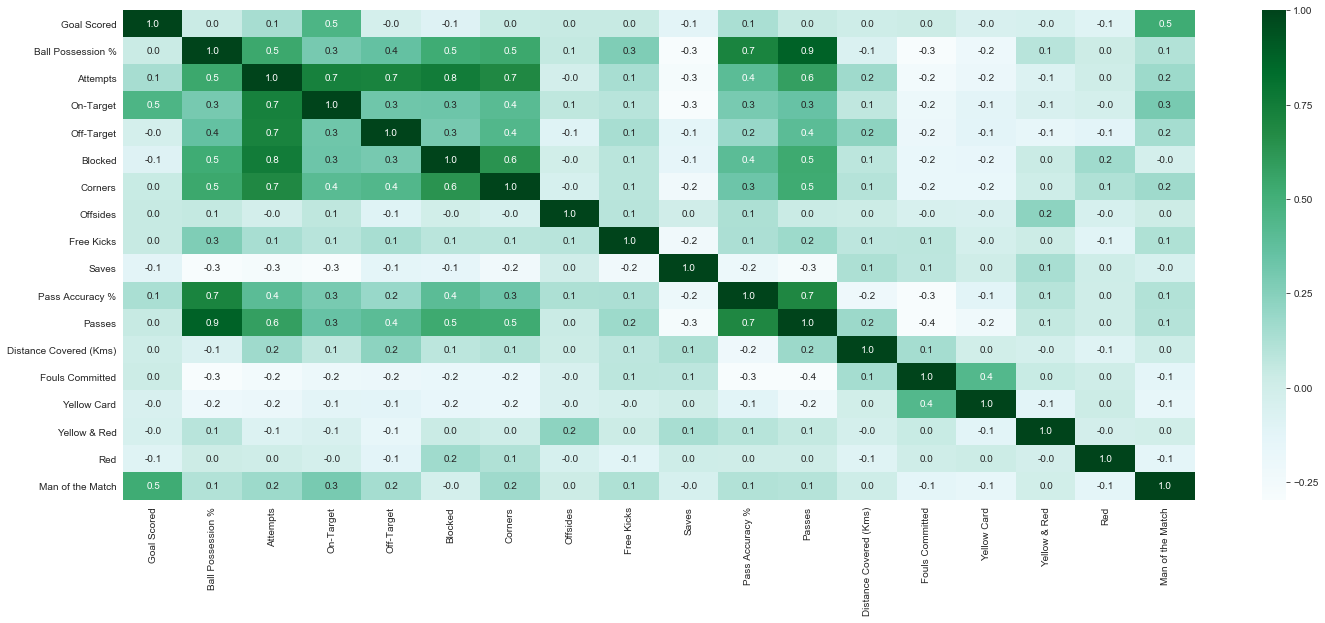

<Figure size 1728x648 with 0 Axes>

In [112]:
viz.show_corr_heatmap()

In [116]:
train, test = model_selection.train_test_split(train_df, test_size=0.3, random_state=42)

In [126]:
print(train.shape, test.shape)

(89, 18) (39, 18)


In [130]:
y_train = train['Man of the Match']  
x_train = train.drop(['Man of the Match'], axis=1)  
y_test = test['Man of the Match']  
x_test = test.drop(['Man of the Match'], axis=1)  

In [134]:
y_test.mean()

0.6153846153846154

In [138]:
y_train.mean()

0.449438202247191

In [142]:
rf = RandomForestClassifier()

In [146]:
rf.fit(x_train, y_train)  
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

Features sorted by their score:
[(0.1327, 'Attempts'), (0.1208, 'Goal Scored'), (0.1081, 'Ball Possession %'), (0.0893, 'Passes'), (0.0725, 'Free Kicks'), (0.0706, 'On-Target'), (0.0536, 'Saves'), (0.0532, 'Yellow Card'), (0.0526, 'Pass Accuracy %'), (0.0523, 'Off-Target'), (0.0504, 'Blocked'), (0.0502, 'Distance Covered (Kms)'), (0.0439, 'Fouls Committed'), (0.0302, 'Corners'), (0.0194, 'Offsides'), (0.0, 'Yellow & Red'), (0.0, 'Red')]


In [150]:
all_vars = x_train.columns.tolist()
top_vars = ['Attempts', 'Goal Scored', 'Ball Possession', 'Passes', 'Free Kicks', 'On-Target', 'Saves', 'Yellow Card', 'Pass Accuracy %', 'Off-target', 'Blocked', 'Distance Covered (Kms)']
bottom_vars = [cols for cols in all_vars if cols not in top_vars]
x_train    = x_train.drop(bottom_vars, axis=1)  
x_test     = x_test.drop(bottom_vars, axis=1)  

In [154]:
# Instantiate
logit_model = LogisticRegression()  
# Fit
logit_model = logit_model.fit(x_train, y_train)  
# How accurate?
logit_model.score(x_train, y_train) 

0.7640449438202247

In [158]:
predicted = pd.DataFrame(logit_model.predict(x_test))  
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))  
print(metrics.accuracy_score(y_test, predicted) ) 

0.7948717948717948


In [162]:
print(metrics.confusion_matrix(y_test, predicted) )

[[13  2]
 [ 6 18]]


In [166]:
 print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.68      0.87      0.76        15
          1       0.90      0.75      0.82        24

avg / total       0.82      0.79      0.80        39

